# Teacher Salary Analysis

In [1]:
import numpy as np
import pandas as pd
from src.wrangle import read_and_filter_data

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 200)

## Acquire + Prepare

In [2]:
df = read_and_filter_data()

c:\Users\chris\OneDrive\Desktop\Anias\Teacher_Payroll_Analysis\src\wrangle.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522711 entries, 60282 to 587678
Data columns (total 19 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Fiscal Year                        522711 non-null  int64         
 1   Hire Date                          522711 non-null  datetime64[ns]
 2   Hire Year                          522711 non-null  Int16         
 3   Years of Employment                522711 non-null  Int16         
 4   FirstMidLastStart                  522711 non-null  object        
 5   Salary                             522711 non-null  float64       
 6   Total Other Pay                    522711 non-null  float64       
 7   Total Paid                         522711 non-null  float64       
 8   Employment Category                522711 non-null  category      
 9   Salary Category                    522709 non-null  category      
 10  Total Paid Category  

In [4]:
df.head(2).T

,60282,60283
Fiscal Year,2015,2015
Hire Date,2008-08-28 00:00:00,2013-09-03 00:00:00
Hire Year,2008,2013
Years of Employment,7,2
FirstMidLastStart,OgbonnayaINwankwo2008-08-28,ElizabethMGerner2013-09-03
Salary,75869.0,50899.0
Total Other Pay,0.0,0.0
Total Paid,69467.6,49826.18
Employment Category,6-10,0-5
Salary Category,60k-80k,40k-60k


In [5]:
df.tail(2).T

,587677,587678
Fiscal Year,2023,2023
Hire Date,1998-09-08 00:00:00,1997-10-07 00:00:00
Hire Year,1998,1997
Years of Employment,25,26
FirstMidLastStart,TiffaniMGiambrone1998-09-08,MichelleAZytko Morgan1997-10-07
Salary,111350.0,128657.0
Total Other Pay,-560.79,-3527.68
Total Paid,109416.11,101899.62
Employment Category,21-25,26-30
Salary Category,100k-120k,120k-140k


In [6]:
df.describe().round().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,522711.0,2019.0,2015.0,2017.0,2019.0,2021.0,2023.0,3.0
Hire Date,522711,2005-01-03 11:13:39.538903936,1980-01-02 00:00:00,1998-11-09 00:00:00,2004-09-07 00:00:00,2013-01-01 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,522711.0,2004.0,1980.0,1998.0,2004.0,2013.0,2023.0,9.0
Years of Employment,522711.0,14.0,0.0,7.0,14.0,21.0,43.0,9.0
Salary,522711.0,91290.0,37016.0,76706.0,91757.0,105142.0,148657.0,19498.0
Total Other Pay,522711.0,2012.0,-64036.0,0.0,0.0,2194.0,104948.0,4390.0
Total Paid,522711.0,83699.0,-23864.0,67448.0,86676.0,105800.0,448270.0,31110.0
Salary Delta,522711.0,5.0,-45.0,0.0,4.0,6.0,106.0,6.0
Total Paid Delta,522711.0,2171.0,-45936.0,0.0,4.0,9.0,752583300.0,1098708.0
Salary Monetary Diff,522711.0,3869.0,-56610.0,0.0,3244.0,5571.0,58176.0,4623.0


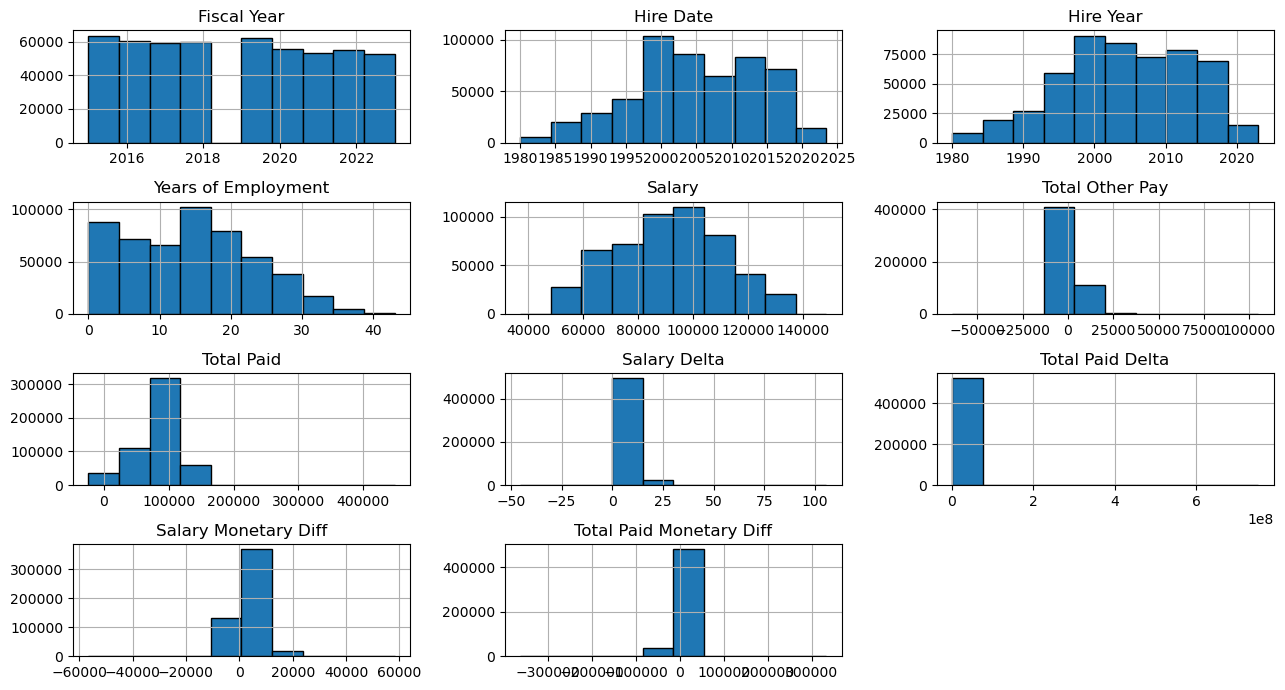

In [7]:
df.hist(figsize=(13,7), ec='black')
plt.tight_layout();

## Exploratory Data Analysis

<Axes: >

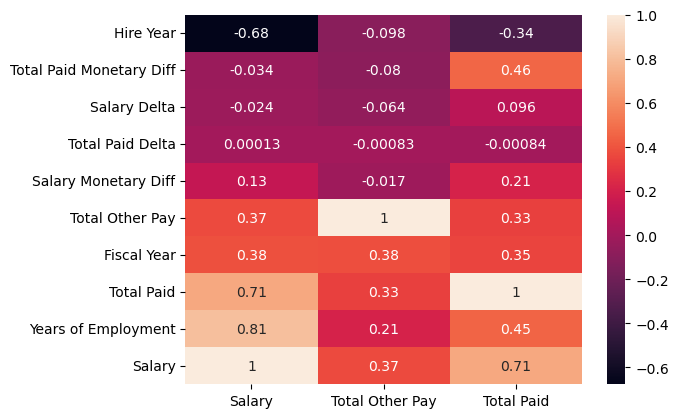

In [8]:
sns.heatmap(df.select_dtypes(include='number').corr()[['Salary','Total Other Pay', 'Total Paid']].sort_values(by='Salary'),
            annot=True)

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


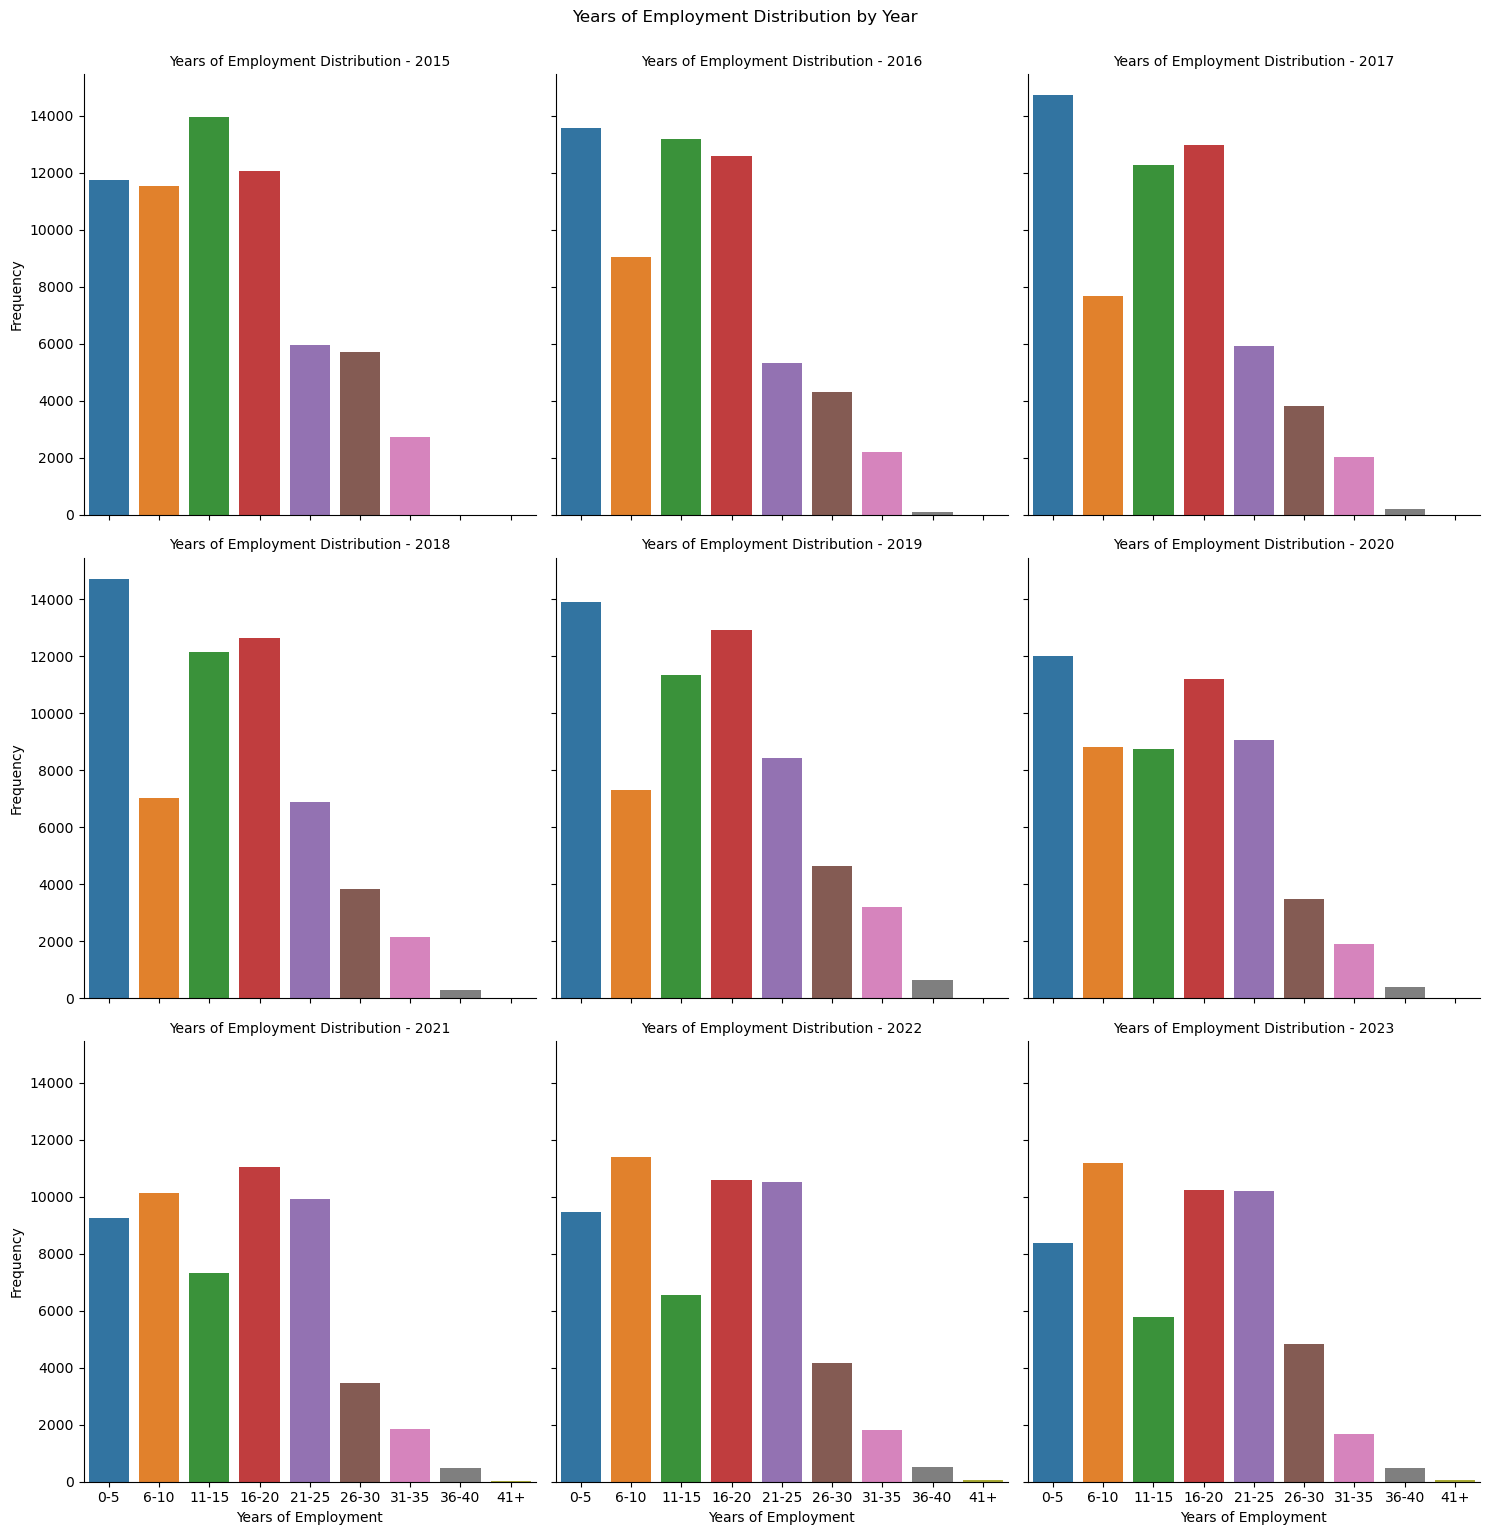

In [9]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Employment Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Employment Category'].value_counts().sort_index().index)
g.set_titles("Years of Employment Distribution - {col_name}")
g.set_axis_labels('Years of Employment', 'Frequency')
g.fig.suptitle('Years of Employment Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


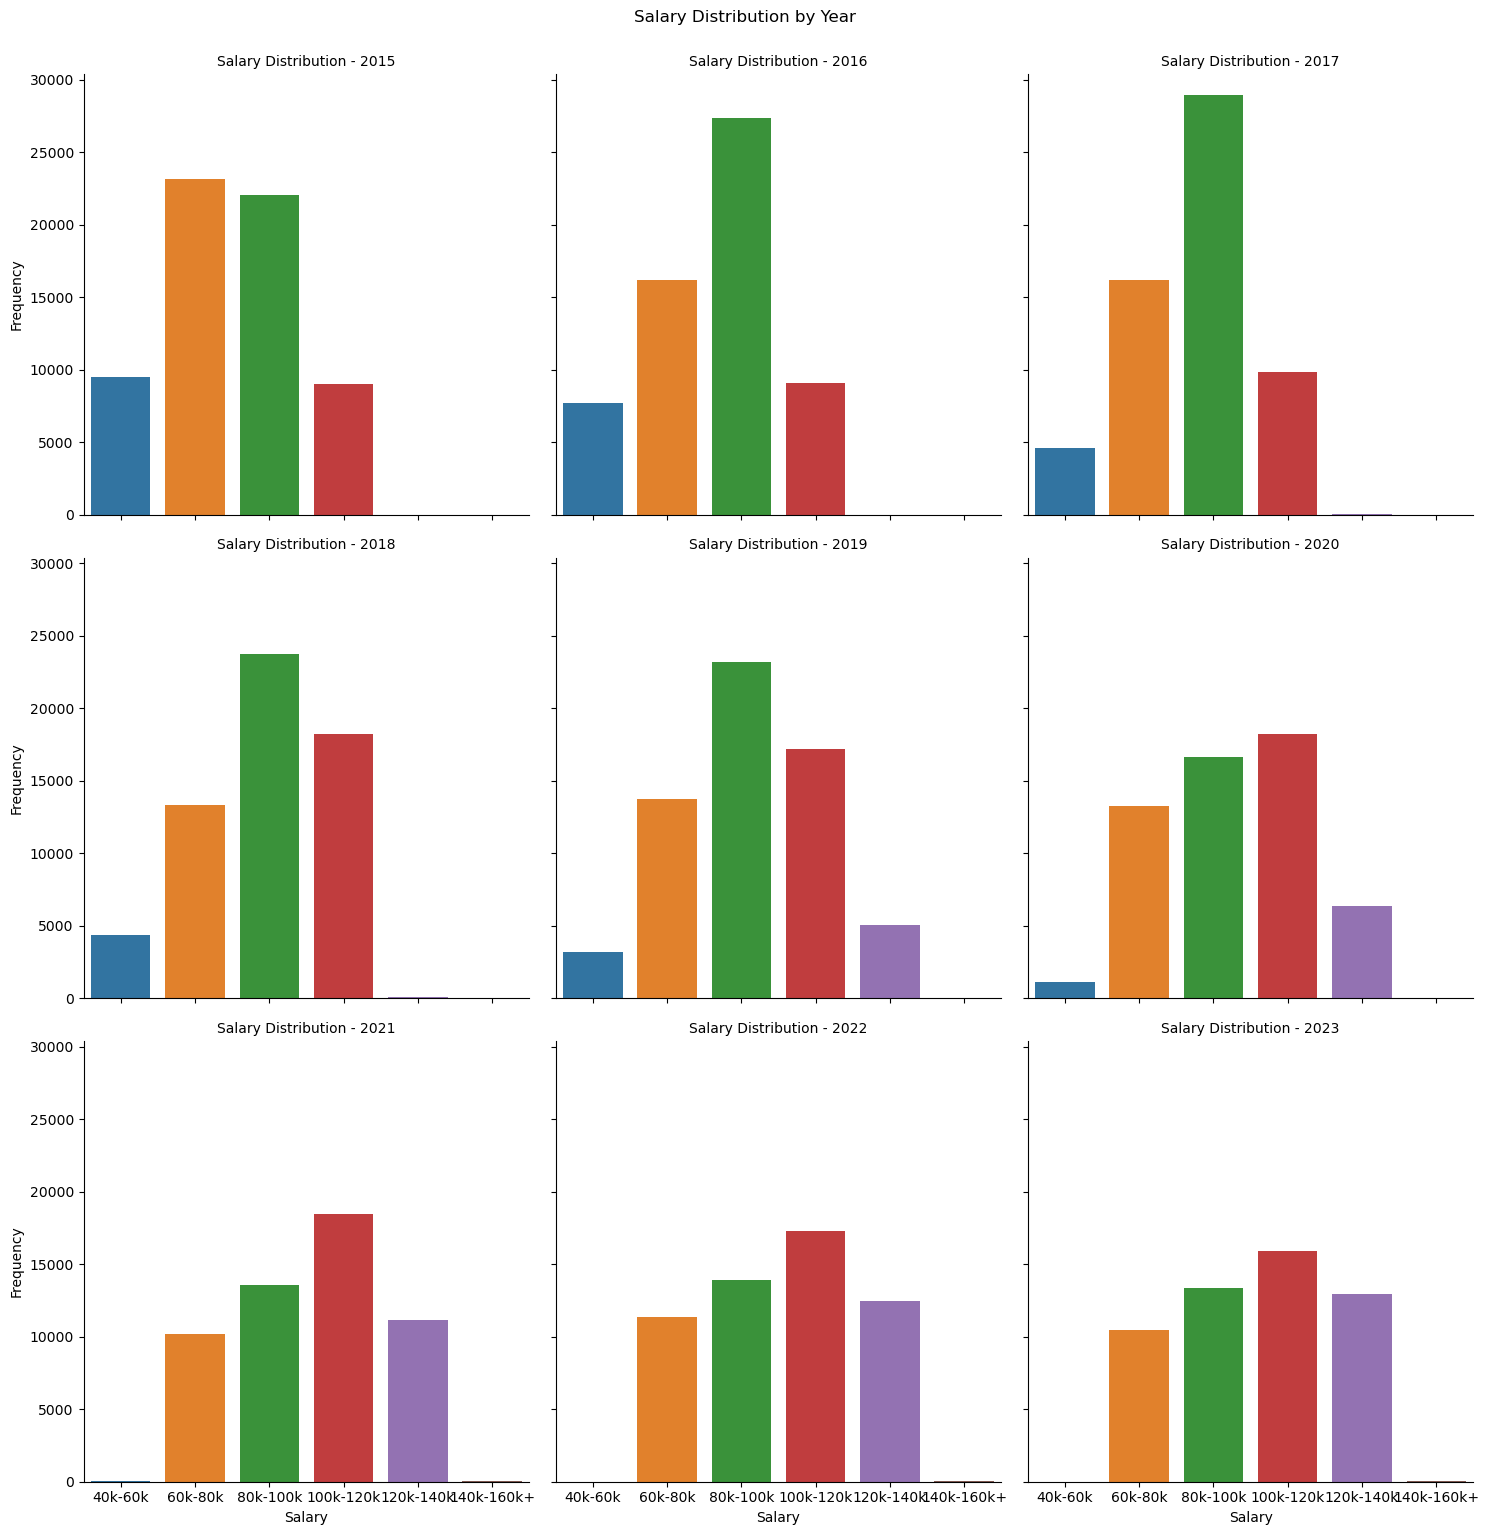

In [10]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Salary Category', col='Fiscal Year', kind='count',
                col_wrap=3, order=df['Salary Category'].value_counts().sort_index().index)
g.set_titles("Salary Distribution - {col_name}")
g.set_axis_labels('Salary', 'Frequency')
g.fig.suptitle('Salary Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


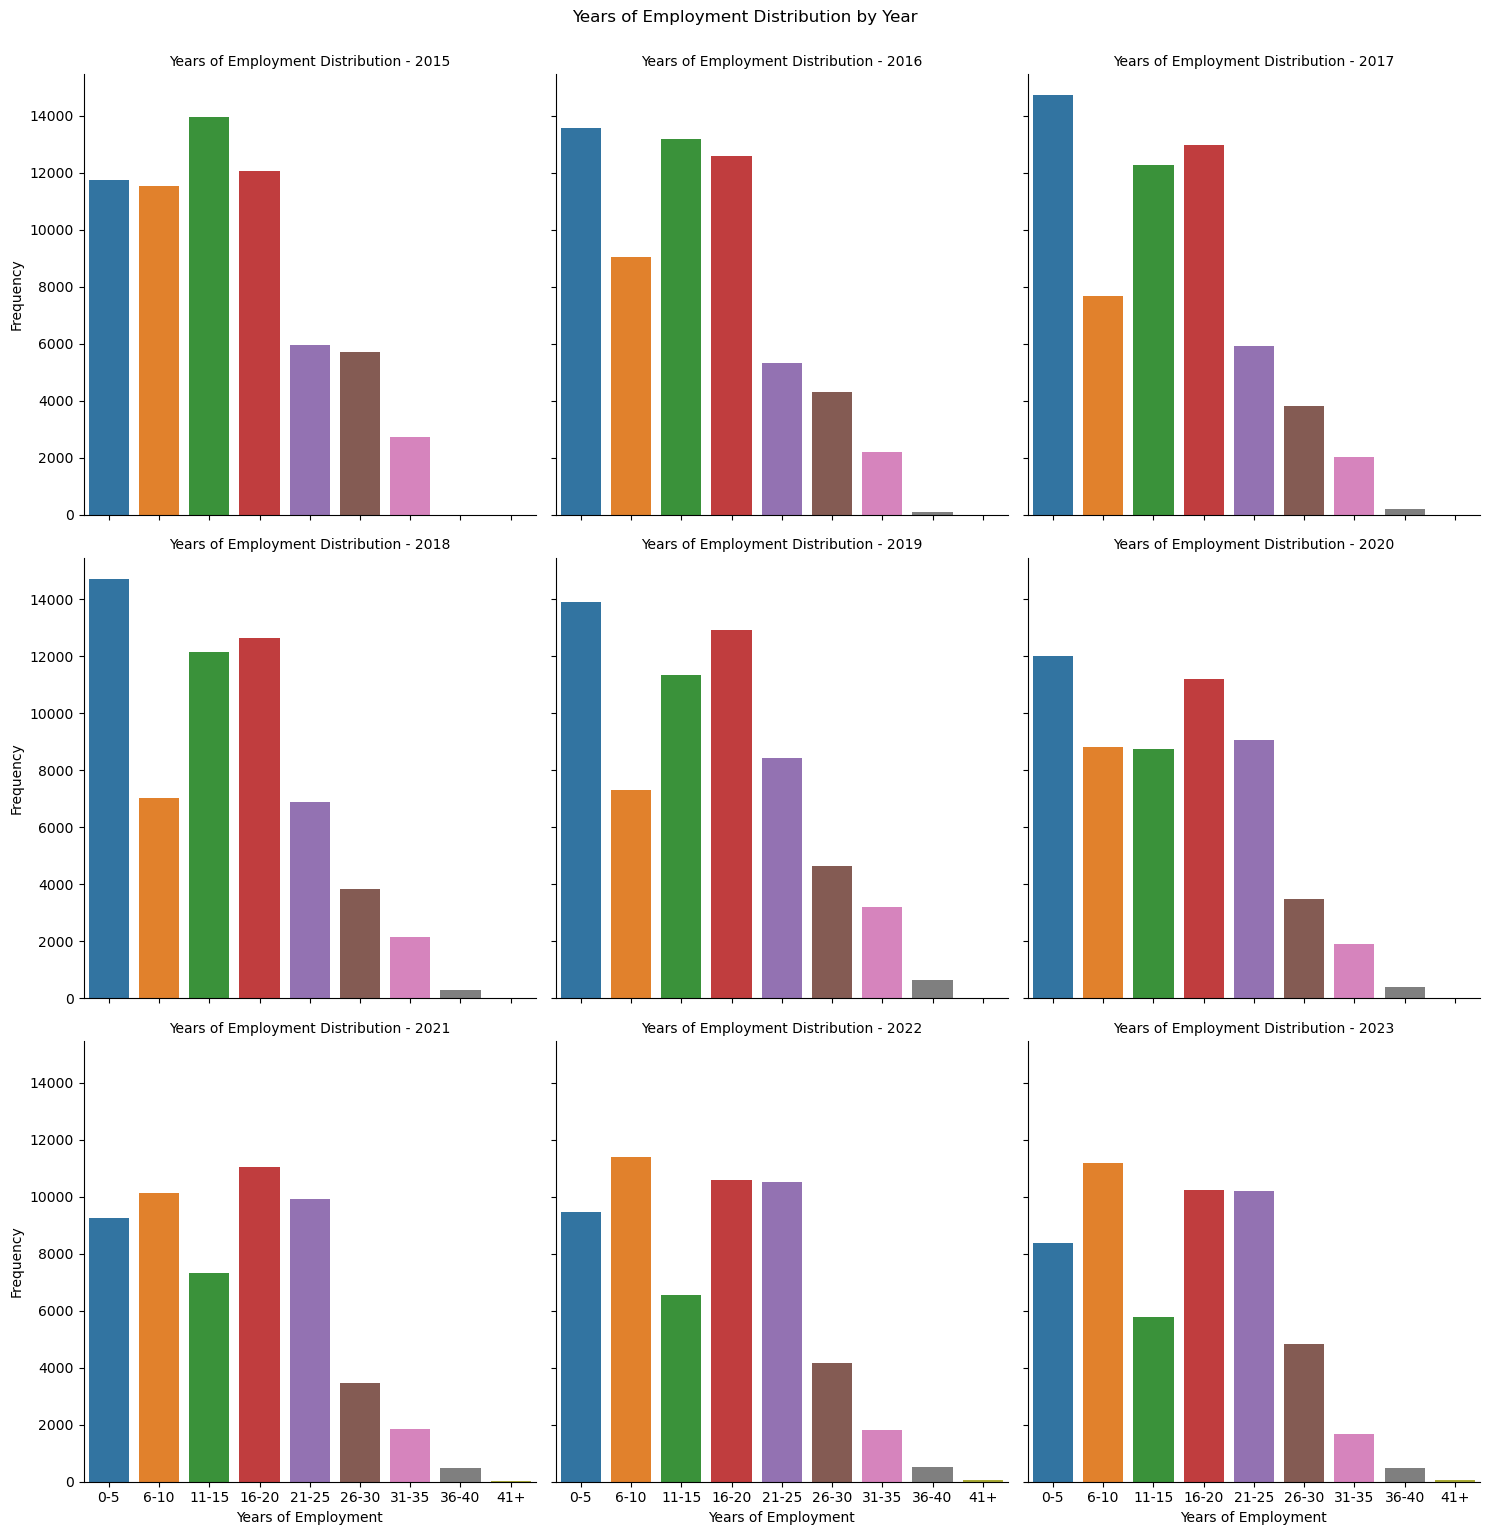

In [11]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Employment Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Employment Category'].value_counts().sort_index().index)
g.set_titles("Years of Employment Distribution - {col_name}")
g.set_axis_labels('Years of Employment', 'Frequency')
g.fig.suptitle('Years of Employment Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


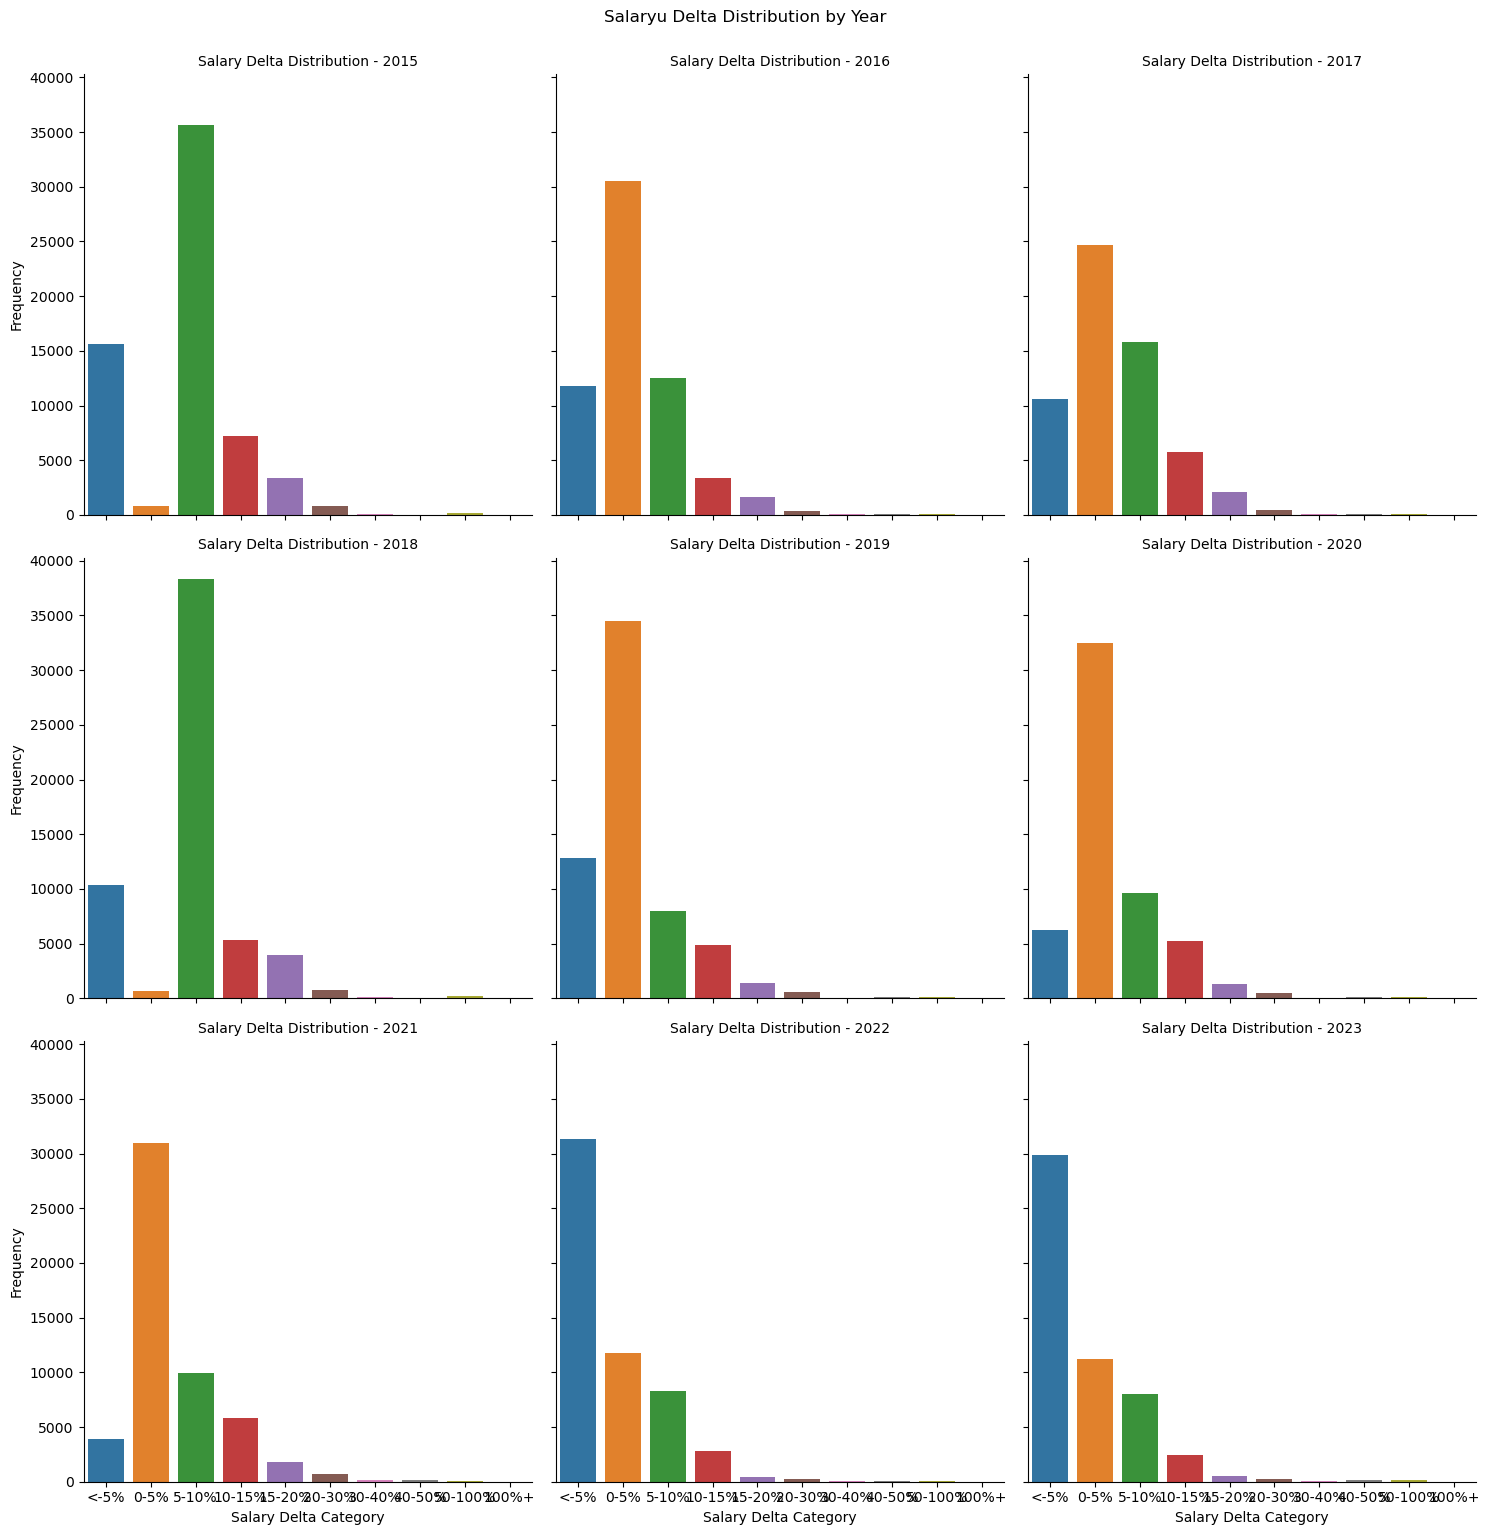

In [12]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Salary Delta Category', col='Fiscal Year', kind='count',
                col_wrap=3, order=df['Salary Delta Category'].value_counts().sort_index().index)
g.set_titles("Salary Delta Distribution - {col_name}")
g.set_axis_labels('Salary Delta Category', 'Frequency')
g.fig.suptitle('Salaryu Delta Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

c:\Users\chris\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


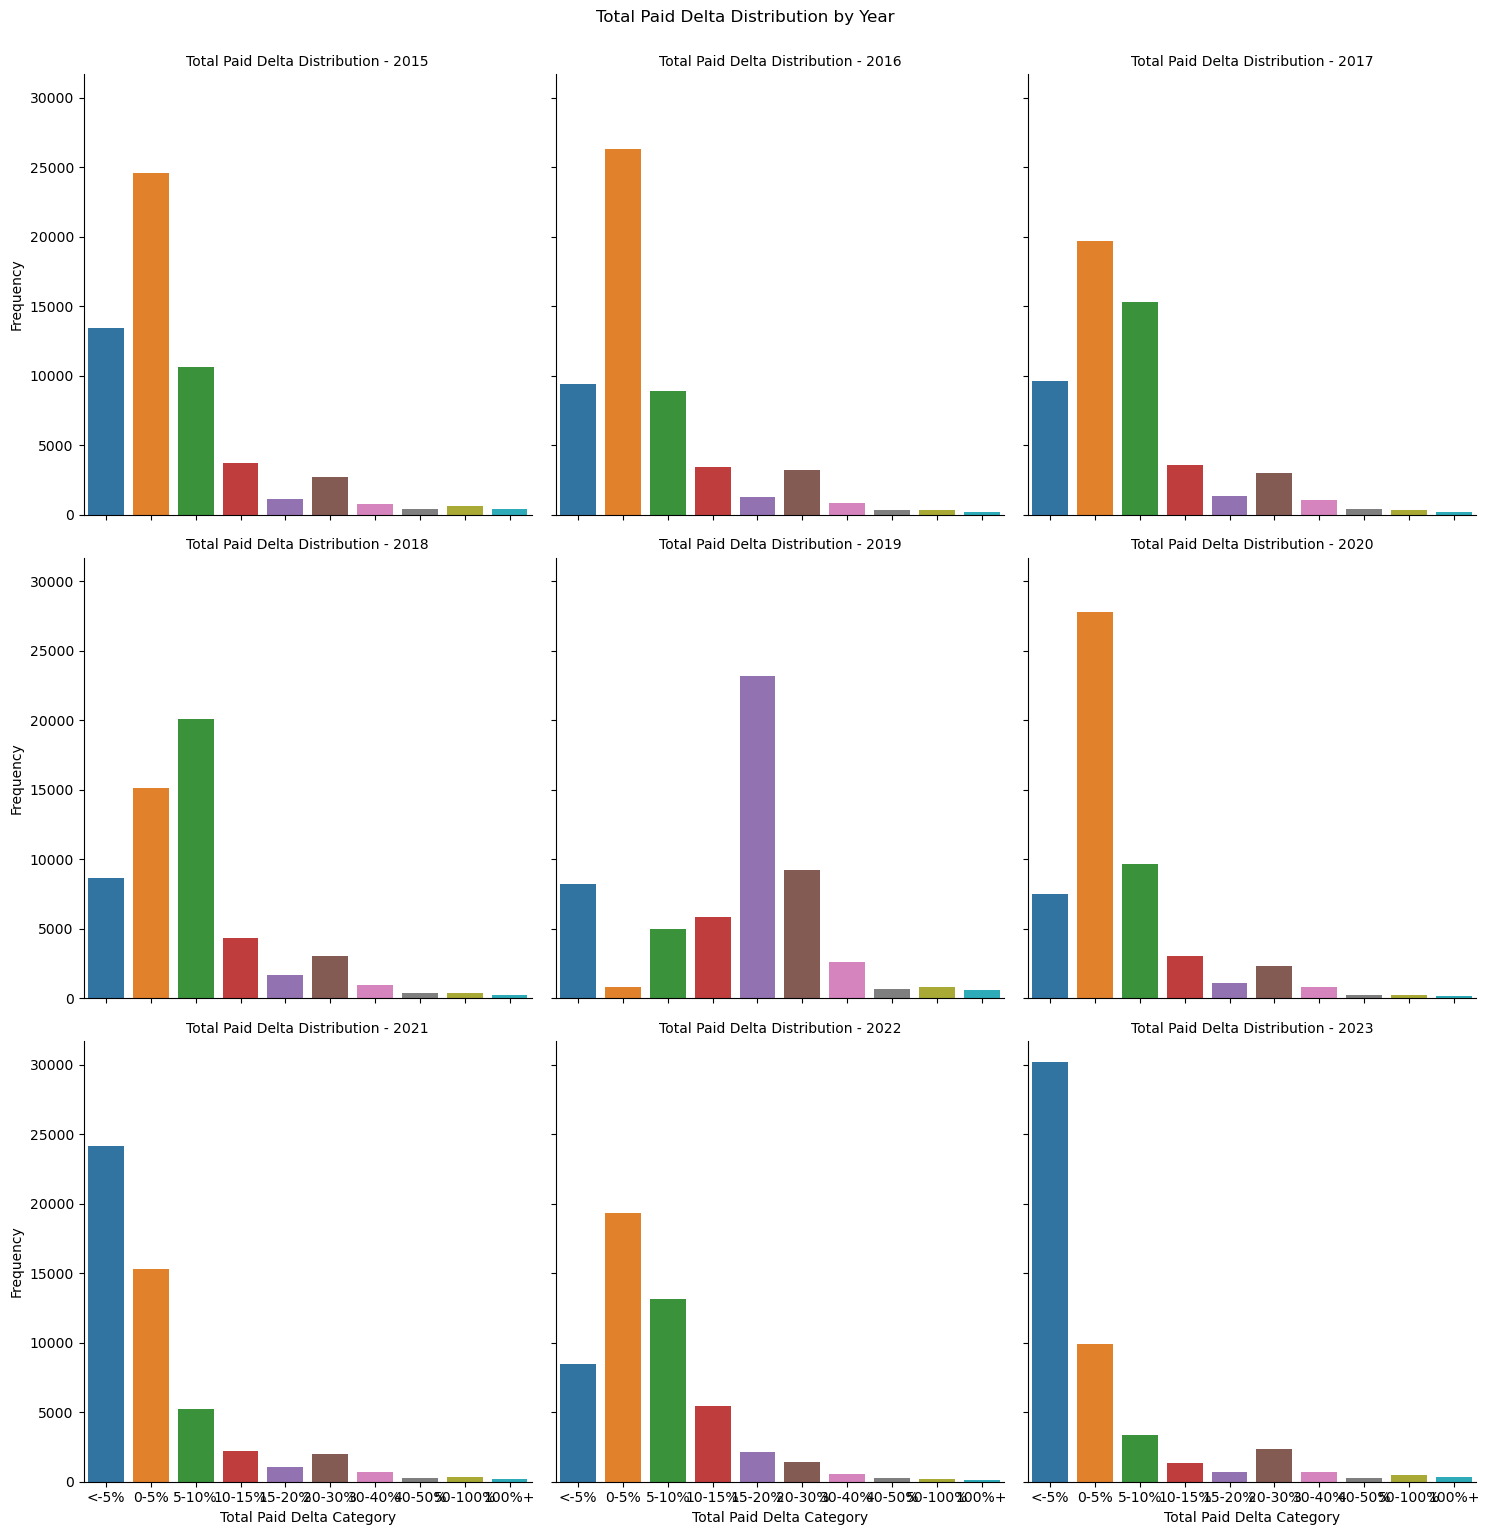

In [13]:
# Create subplots using sns.catplot
g = sns.catplot(data=df, x='Total Paid Delta Category', col='Fiscal Year', kind='count',
                col_wrap=3,order=df['Total Paid Delta Category'].value_counts().sort_index().index)
g.set_titles("Total Paid Delta Distribution - {col_name}")
g.set_axis_labels('Total Paid Delta Category', 'Frequency')
g.fig.suptitle('Total Paid Delta Distribution by Year', y=1.02)  # Add a main title for the entire plot

plt.show()

In [14]:
df[df['Fiscal Year']==2023].groupby(by=['Years of Employment'])[['Salary','Total Other Pay']].agg(['min','median','max', 'count'])

Salary                           Total Other Pay  \
                          min    median       max count             min   
Years of Employment                                                       
0                     61070.0   62799.0   96183.0   117        -1908.45   
1                     61070.0   68652.0  103771.0  1284       -14557.25   
2                     61070.0   69866.0   96183.0  2231       -12804.24   
3                     61070.0   69866.0  109852.0   982        -9754.16   
4                     61070.0   71290.0  103683.0  1672       -13826.04   
5                     61070.0   72490.0  103683.0  2075        -9615.55   
6                     61070.0   79193.0  117469.0  2243       -18892.93   
7                     61070.0   85143.0  109969.0  2403       -15405.65   
8                     53934.0   89890.0  109969.0  2298       -12731.60   
9                     58481.0   93675.0  117469.0  2397       -14214.65   
10                    49385.0   97469.0  121441.0  1845       -16366.16   
11                    56317.0   97647.0  121441.0  1674       -19531.43   
12                    61070.0  100856.5  121441.0  1268       -21821.58   
13                    61070.0  101441.0  124145.0   859       -23579.34   
14                    58481.0  101441.0  124145.0   458       -14459.96   
15                    61070.0  104145.0  124145.0  1506       -45986.11   
16                    53934.0  109852.0  129852.0  2105       -28871.16   
17                    56317.0  109852.0  129852.0  1980       -25480.67   
18                    61070.0  109852.0  131350.0  2078       -26044.44   
19                    57713.0  111350.0  131350.0  2010       -27590.79   
20                    61070.0  111350.0  142424.0  2067       -18093.67   
21                    62284.0  122424.0  134924.0  1979       -55504.18   
22                    61070.0  122424.0  141157.0  2221       -24519.79   
23                    61070.0  124863.0  141157.0  1919       -37157.79   
24                    61070.0  122424.0  141157.0  2296       -34747.52   
25                    62284.0  128657.0  148657.0  1771       -24417.91   
26                    61070.0  128657.0  136157.0  1638       -42391.10   
27                    61070.0  128657.0  141157.0  1245       -31925.30   
28                    61070.0  128657.0  141157.0   676       -17507.97   
29                    72576.0  128657.0  141157.0   678        -9392.65   
30                    62284.0  128657.0  141157.0   602       -20558.08   
31                    57940.0  128657.0  141157.0   518       -24186.82   
32                    62284.0  128657.0  141157.0   327       -15561.74   
33                    72076.0  128657.0  148657.0   346        -6251.85   
34                    65780.0  128657.0  141157.0   286       -12187.20   
35                    62284.0  128657.0  136157.0   199        -5225.68   
36                    62799.0  128657.0  148657.0   166        -7134.23   
37                    82308.0  128657.0  128657.0   103        -3864.36   
38                    63708.0  128657.0  128657.0   109       -10791.96   
39                    61070.0  128657.0  128657.0    62       -10424.31   
40                    93862.0  128657.0  128657.0    29        -1946.54   
41                   111350.0  128657.0  128657.0    18        -1139.36   
42                   113496.0  128657.0  128657.0    21        -7460.69   
43                   106058.0  128657.0  128657.0    11           46.14   

                                               
                       median       max count  
Years of Employment                            
0                    2205.300  11328.38   117  
1                    2232.715  31600.69  1284  
2                     611.140  22278.03  2231  
3                     818.860  21373.42   982  
4                     747.280  22313.87  1672  
5                     701.900  28805.55  2075  
6                     611.140  94466.93  2243  
7                

In [15]:
df[df['Fiscal Year']==2023].groupby(by=['Employment Category'])['Total Other Pay'].agg(['min','median','max'])

,min,median,max
Employment Category,,,
0-5,-14557.25,838.040,31600.69
6-10,-18892.93,565.760,94466.93
11-15,-45986.11,597.570,65517.93
16-20,-28871.16,520.380,51331.61
21-25,-55504.18,475.000,44672.58
26-30,-42391.10,475.000,72483.48
31-35,-24186.82,475.000,46105.13
36-40,-10791.96,475.000,29408.14
41+,-7460.69,1036.265,27732.93


In [16]:
df[df['Fiscal Year']==2023].describe().T

,count,mean,min,25%,50%,75%,max,std
Fiscal Year,52772.0,2023.0,2023.0,2023.0,2023.0,2023.0,2023.0,0.0
Hire Date,52772,2008-03-10 08:23:43.300235008,1980-02-01 00:00:00,2001-02-01 00:00:00,2007-08-30 00:00:00,2015-10-19 00:00:00,2023-06-14 00:00:00,NaN
Hire Year,52772.0,2007.584003,1980.0,2001.0,2007.0,2015.0,2023.0,8.869088
Years of Employment,52772.0,15.415997,0.0,8.0,16.0,22.0,43.0,8.869088
Salary,52772.0,100662.999147,49385.0,88604.0,101441.0,118630.0,148657.0,20001.124687
Total Other Pay,52772.0,1696.99777,-55504.18,475.0,520.38,1564.12,94466.93,4200.019521
Total Paid,52772.0,95030.510523,678.56,78722.7,100712.35,114528.605,208491.92,28180.668349
Salary Delta,52772.0,2.556691,-40.59,0.0,0.0,4.18,83.24,6.003897
Total Paid Delta,52772.0,61.127195,-97.7,-4.21,-0.89,2.82,1982416.52,9875.131272
Salary Monetary Diff,52772.0,2196.293546,-52730.0,0.0,0.0,3785.0,57367.0,5140.614282
